In [44]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [187]:
# Read in the dataset
df = pd.read_csv("adult.data.csv", header=0)
df.head()

,age,type_employer,eduation,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [41]:
# Trim all trailing/leading whitespace (makes equality cleaner)
df.type_employer = df.type_employer.str.strip()
df.eduation = df.eduation.str.strip()
df.marital = df.marital.str.strip()
df.occupation = df.occupation.str.strip()
df.relationship = df.relationship.str.strip()
df.race = df.race.str.strip()
df.sex = df.sex.str.strip()
df.country = df.country.str.strip()
df.income = df.income.str.strip()
#print(df.type_employer[0], df.eduation[0], df.marital[0], df.occupation[0], df.relationship[0], df.race[0], df.sex[0])

df.describe()

,age,education_num,capital_gain,capital_loss,hr_per_week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


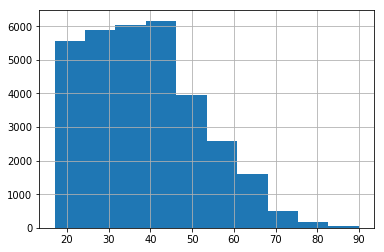

In [45]:
df.age.hist()

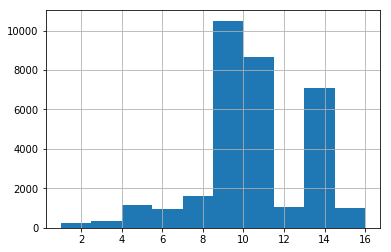

In [46]:
df.education_num.hist()

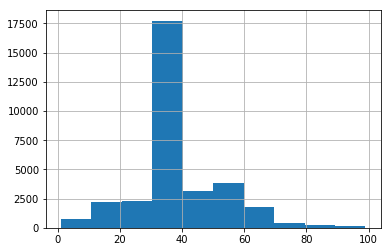

In [47]:
df.hr_per_week.hist()

In [165]:
def makeMatrixPlot(attribute, u):
    d = dict()
    for i in range(len(u)):
        d[u[i]] = [df.loc[(attribute == u[i]) & (df.income == '<=50K')].shape[0], 
                   df.loc[(attribute == u[i]) & (df.income == '>50K')].shape[0],
                   df.loc[(attribute == u[i])].shape[0]]
    Y = [None] * len(d)
    X = np.zeros(len(d))
    i = 0
    for key, value in d.items():
        Y[i] = key
        d[key][0] = d[key][0] / d[key][2]
        d[key][1] = d[key][1] / d[key][2]
        X[i] = d[key][0]
        i+=1
    fig, ax = plt.subplots(1,1) 
    plt.bar(range(len(Y)),X)
    ax.set_xticks(range(len(Y)))
    ax.set_xticklabels(Y, rotation='vertical', fontsize=10)
    fig.show()
    return d

def makeMatrix(attribute, u):
    d = dict()
    for i in range(len(u)):
        d[u[i]] = [df.loc[(attribute == u[i]) & (df.income == '<=50K')].shape[0], 
                   df.loc[(attribute == u[i]) & (df.income == '>50K')].shape[0],
                   df.loc[(attribute == u[i])].shape[0]]
    for key, value in d.items():
        d[key][0] = d[key][0] / d[key][2]
        d[key][1] = d[key][1] / d[key][2]
    return d

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


{'Female': [0.8905394113824158, 0.10946058861758426, 10771],
 'Male': [0.6942634235888022, 0.3057365764111978, 21790]}

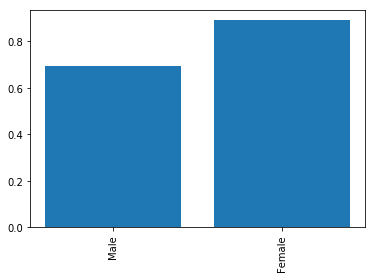

In [166]:
genderMatrix = makeMatrixPlot(df.sex, df.sex.unique())
genderMatrix
# Males are almost 20% more likely to make over 50k
# Might be more influenced by women having less school / different types of jobs

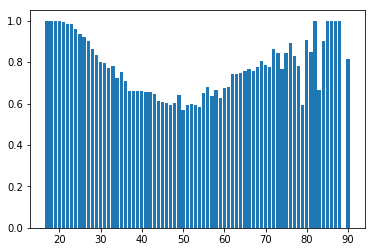

In [154]:
ageMatrix = makeMatrix(df.age, df.age.unique())
Y = np.zeros(len(ageMatrix))
X = np.zeros(len(ageMatrix))
i = 0
for key, value in ageMatrix.items():
    Y[i] = key
    X[i] = ageMatrix[key][0]
    i+=1
plt.bar(Y, X)
plt.show()
# Not sure if we can make any big conclusions about this because it's
# reasonable for people 30-60 to peak in their career and make more money

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


{'Amer-Indian-Eskimo': [0.8842443729903537, 0.1157556270096463, 311],
 'Asian-Pac-Islander': [0.7343599615014437, 0.26564003849855633, 1039],
 'Black': [0.8761203585147247, 0.12387964148527529, 3124],
 'Other': [0.9077490774907749, 0.09225092250922509, 271],
 'White': [0.7441400632729365, 0.2558599367270636, 27816]}

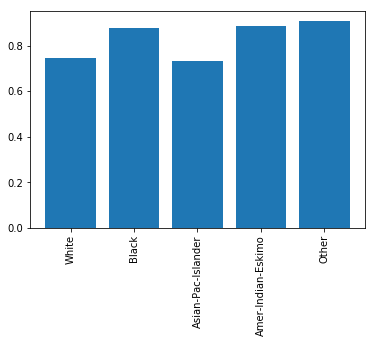

In [181]:
raceMatrix = makeMatrixPlot(df.race, df.race.unique())
raceMatrix
# We can reasonably conclude that white/asian people
# are more likely to make more money, but (like gender) we 
# may want to supplement with job type/education
# because there could be contextual explanations

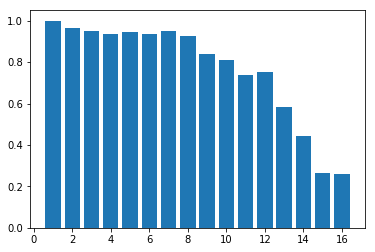

{1: [1.0, 0.0, 51],
 2: [0.9642857142857143, 0.03571428571428571, 168],
 3: [0.9519519519519519, 0.04804804804804805, 333],
 4: [0.9380804953560371, 0.06191950464396285, 646],
 5: [0.9474708171206225, 0.05252918287937743, 514],
 6: [0.9335476956055734, 0.06645230439442658, 933],
 7: [0.948936170212766, 0.05106382978723404, 1175],
 8: [0.9237875288683602, 0.07621247113163972, 433],
 9: [0.8404913817731645, 0.15950861822683554, 10501],
 10: [0.809765464271019, 0.19023453572898094, 7291],
 11: [0.7387843704775687, 0.26121562952243127, 1382],
 12: [0.7516401124648547, 0.24835988753514526, 1067],
 13: [0.5852474323062559, 0.4147525676937442, 5355],
 14: [0.4434126523505514, 0.5565873476494486, 1723],
 15: [0.265625, 0.734375, 576],
 16: [0.25907990314769974, 0.7409200968523002, 413]}

In [175]:
eduMatrix = makeMatrix(df.education_num, df.education_num.unique())
Y = np.zeros(len(eduMatrix))
X = np.zeros(len(eduMatrix))
i = 0
for key, value in eduMatrix.items():
    Y[i] = key
    X[i] = eduMatrix[key][0]
    i+=1
plt.bar(Y, X)
plt.show()
eduMatrix
# reasonable results - bachelors = 13, 16 = PhD
# we would expect people with more education to have higher earning
# jobs

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


{'?': [0.8963646228974498, 0.10363537710255019, 1843],
 'Adm-clerical': [0.8655172413793103, 0.13448275862068965, 3770],
 'Armed-Forces': [0.8888888888888888, 0.1111111111111111, 9],
 'Craft-repair': [0.7733593559404733, 0.22664064405952672, 4099],
 'Exec-managerial': [0.5159862272503689, 0.4840137727496311, 4066],
 'Farming-fishing': [0.8843058350100603, 0.11569416498993963, 994],
 'Handlers-cleaners': [0.9372262773722628, 0.06277372262773723, 1370],
 'Machine-op-inspct': [0.8751248751248751, 0.12487512487512488, 2002],
 'Other-service': [0.958421851289833, 0.04157814871016692, 3295],
 'Priv-house-serv': [0.9932885906040269, 0.006711409395973154, 149],
 'Prof-specialty': [0.5509661835748793, 0.44903381642512075, 4140],
 'Protective-serv': [0.674884437596302, 0.325115562403698, 649],
 'Sales': [0.7306849315068493, 0.2693150684931507, 3650],
 'Tech-support': [0.6950431034482759, 0.30495689655172414, 928],
 'Transport-moving': [0.799624295554164, 0.20037570444583594, 1597]}

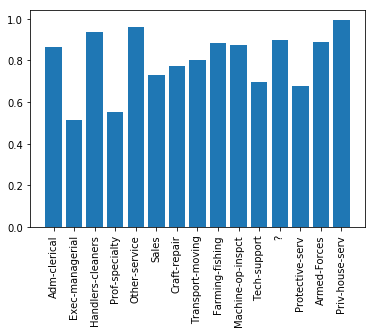

In [182]:
ocMatrix = makeMatrixPlot(df.occupation, df.occupation.unique())
ocMatrix
# Doesn't need to be protected because I don't think you can discriminate by
# industry? But there is a predictable difference between different types
# of jobs - ex: Executives make more that farmers/fisherman

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


{'Divorced': [0.8957911321179384, 0.10420886788206167, 4443],
 'Married-AF-spouse': [0.5652173913043478, 0.43478260869565216, 23],
 'Married-civ-spouse': [0.5531517094017094, 0.4468482905982906, 14976],
 'Married-spouse-absent': [0.9186602870813397, 0.08133971291866028, 418],
 'Never-married': [0.9540391275858842, 0.04596087241411589, 10683],
 'Separated': [0.935609756097561, 0.06439024390243903, 1025],
 'Widowed': [0.9144008056394763, 0.08559919436052367, 993]}

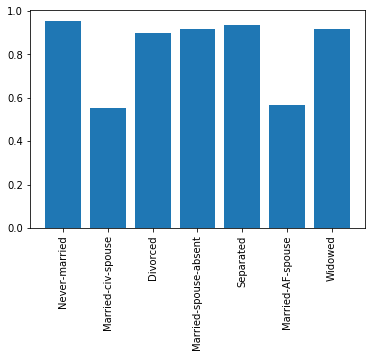

In [178]:
maritalMatrix = makeMatrixPlot(df.marital, df.marital.unique())
maritalMatrix

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


{'?': [0.8959694989106753, 0.10403050108932461, 1836],
 'Federal-gov': [0.6135416666666667, 0.38645833333333335, 960],
 'Local-gov': [0.7052078356426182, 0.29479216435738176, 2093],
 'Never-worked': [1.0, 0.0, 7],
 'Private': [0.7813271060979908, 0.21867289390200917, 22696],
 'Self-emp-inc': [0.44265232974910396, 0.557347670250896, 1116],
 'Self-emp-not-inc': [0.7150728059818969, 0.2849271940181031, 2541],
 'State-gov': [0.7280431432973806, 0.27195685670261943, 1298],
 'Without-pay': [1.0, 0.0, 14]}

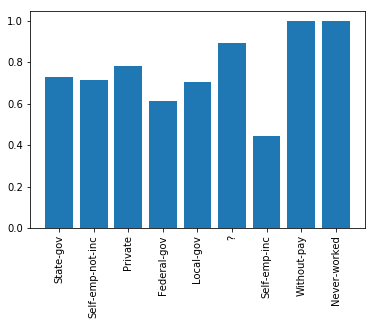

In [180]:
employerMatrix = makeMatrixPlot(df.type_employer, df.type_employer.unique())
employerMatrix

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


{'Husband': [0.551428787993633, 0.448571212006367, 13193],
 'Not-in-family': [0.8969295605057195, 0.10307043949428056, 8305],
 'Other-relative': [0.9622833843017329, 0.03771661569826707, 981],
 'Own-child': [0.9867797947908445, 0.013220205209155485, 5068],
 'Unmarried': [0.9367382472431804, 0.0632617527568195, 3446],
 'Wife': [0.5248724489795918, 0.47512755102040816, 1568]}

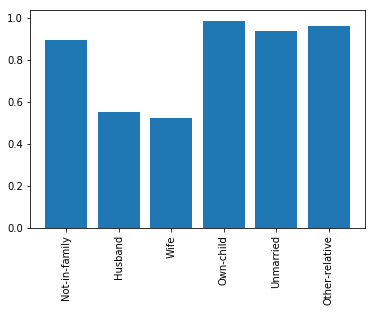

In [183]:
relationshipMatrix = makeMatrixPlot(df.relationship, df.relationship.unique())
relationshipMatrix

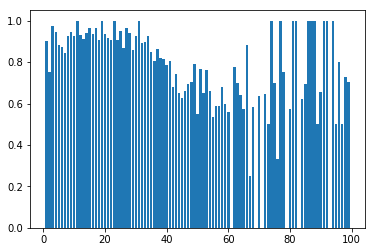

{1: [0.9, 0.1, 20],
 2: [0.75, 0.25, 32],
 3: [0.9743589743589743, 0.02564102564102564, 39],
 4: [0.9444444444444444, 0.05555555555555555, 54],
 5: [0.8833333333333333, 0.11666666666666667, 60],
 6: [0.875, 0.125, 64],
 7: [0.8461538461538461, 0.15384615384615385, 26],
 8: [0.9241379310344827, 0.07586206896551724, 145],
 9: [0.9444444444444444, 0.05555555555555555, 18],
 10: [0.9280575539568345, 0.07194244604316546, 278],
 11: [1.0, 0.0, 11],
 12: [0.930635838150289, 0.06936416184971098, 173],
 13: [0.9130434782608695, 0.08695652173913043, 23],
 14: [0.9411764705882353, 0.058823529411764705, 34],
 15: [0.9628712871287128, 0.03712871287128713, 404],
 16: [0.9365853658536586, 0.06341463414634146, 205],
 17: [0.9655172413793104, 0.034482758620689655, 29],
 18: [0.9066666666666666, 0.09333333333333334, 75],
 19: [1.0, 0.0, 14],
 20: [0.9362745098039216, 0.06372549019607843, 1224],
 21: [0.9166666666666666, 0.08333333333333333, 24],
 22: [0.9090909090909091, 0.09090909090909091, 44],
 23: [

In [186]:
hrMatrix = makeMatrix(df.hr_per_week, df.hr_per_week.unique())
Y = np.zeros(len(hrMatrix))
X = np.zeros(len(hrMatrix))
i = 0
for key, value in hrMatrix.items():
    Y[i] = key
    X[i] = hrMatrix[key][0]
    i+=1
plt.bar(Y, X)
plt.show()
hrMatrix

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


{'?': [0.7495711835334476, 0.2504288164665523, 583],
 'Cambodia': [0.631578947368421, 0.3684210526315789, 19],
 'Canada': [0.6776859504132231, 0.32231404958677684, 121],
 'China': [0.7333333333333333, 0.26666666666666666, 75],
 'Columbia': [0.9661016949152542, 0.03389830508474576, 59],
 'Cuba': [0.7368421052631579, 0.2631578947368421, 95],
 'Dominican-Republic': [0.9714285714285714, 0.02857142857142857, 70],
 'Ecuador': [0.8571428571428571, 0.14285714285714285, 28],
 'El-Salvador': [0.9150943396226415, 0.08490566037735849, 106],
 'England': [0.6666666666666666, 0.3333333333333333, 90],
 'France': [0.5862068965517241, 0.41379310344827586, 29],
 'Germany': [0.6788321167883211, 0.32116788321167883, 137],
 'Greece': [0.7241379310344828, 0.27586206896551724, 29],
 'Guatemala': [0.953125, 0.046875, 64],
 'Haiti': [0.9090909090909091, 0.09090909090909091, 44],
 'Holand-Netherlands': [1.0, 0.0, 1],
 'Honduras': [0.9230769230769231, 0.07692307692307693, 13],
 'Hong': [0.7, 0.3, 20],
 'Hungary':

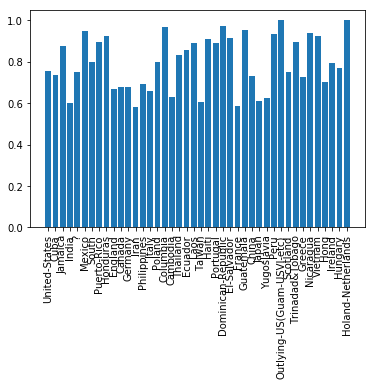

In [185]:
countryMatrix = makeMatrixPlot(df.country, df.country.unique())
countryMatrix